In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Load the dataset
data = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|", low_memory=False)
print(data.head())
# Data Summarization
descriptive_stats = data.describe()
print(descriptive_stats)


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

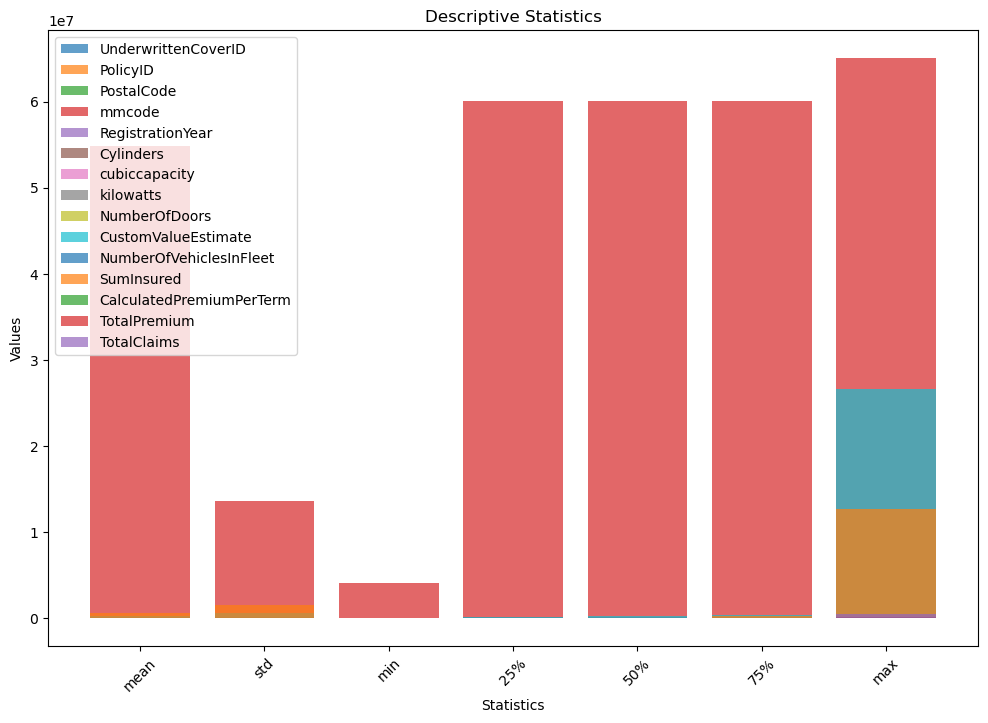

In [37]:
# Extract the columns and values for plotting
columns = descriptive_stats.columns
values = descriptive_stats.values[1:]

# Define x-axis labels
x_labels = descriptive_stats.index[1:]

# Plotting
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.bar(x_labels, values[:, i], alpha=0.7, label=col)

plt.title('Descriptive Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [38]:
print("\nData Structure:")
print(data.dtypes)

# Data Quality Assessment
print("\nMissing Values:")
print(data.isnull().sum())


Data Structure:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoo

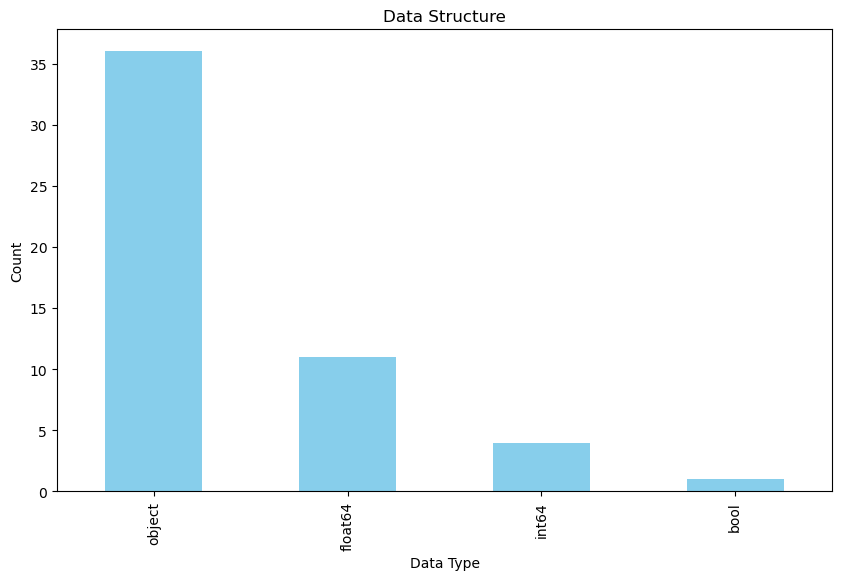

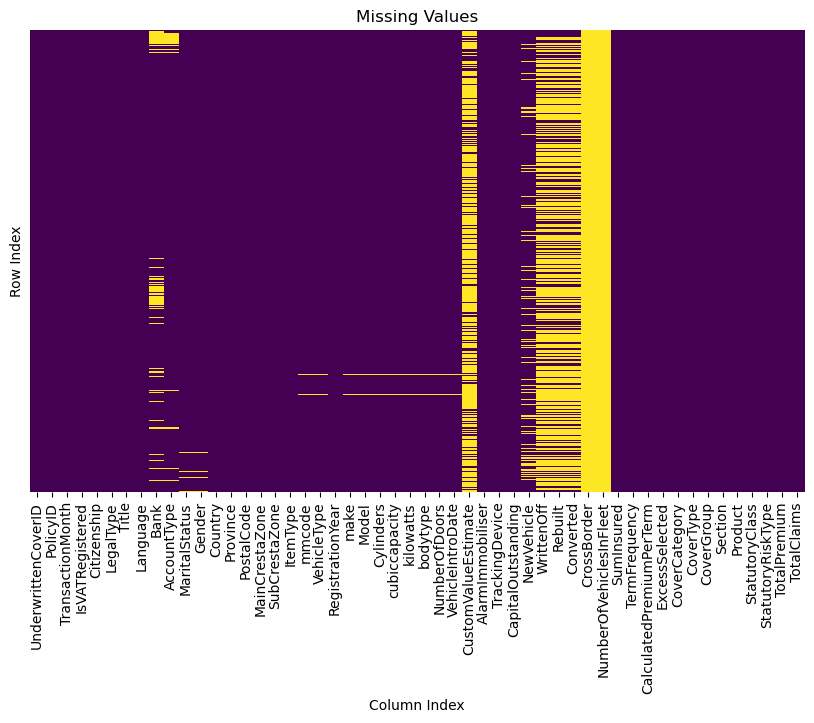

In [6]:
# Data Structure
plt.figure(figsize=(10, 6))
data.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Data Structure')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

# Data Quality Assessment
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [ ]:
# Handle missing values by imputation
# For numerical columns, fill missing values with mean
data.fillna(data.mean(), inplace=True)

# Univariate Analysis
# Plot histograms for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot bar charts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if len(data) > 0:  # Check if there are rows left in the DataFrame
        plt.figure(figsize=(8, 5))
        data[column].value_counts().plot(kind='bar', color='salmon')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y')
        plt.show()
    else:
        print(f"No data available for plotting {column}.")